# Energy range Sensitivity

In [1]:
import astropy.io.fits as pyfits
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy import units as u
from matplotlib import ticker

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('/Users/federica/.matplotlib/stylelib/phdthesis.mpltstyle')


from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import StrMethodFormatter
from matplotlib import ticker
# minorLocator = AutoMinorLocator()

from matplotlib.ticker import ScalarFormatter

In [2]:
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set1_9
import palettable

from palettable.colorbrewer.sequential import YlOrRd_9

niceblack = '#262626'
cmap = ListedColormap(palettable.colorbrewer.qualitative.Set1_9.mpl_colors)
colors_set1_9 = cmap.colors

cmap = ListedColormap(YlOrRd_9.mpl_colors)
colors_YlOrRd_9 = cmap.colors

from palettable.cartocolors.qualitative import Prism_10
cmap = ListedColormap(Prism_10.mpl_colors)
colors_Prism_8 = cmap.colors

from palettable.cartocolors.sequential import OrYel_7
cmap = ListedColormap(OrYel_7.mpl_colors)
colors_orange = cmap.colors


from palettable.cartocolors.sequential import Teal_7
cmap = ListedColormap(Teal_7.mpl_colors)
colors_blue = cmap.colors






In [3]:
#Create a folder with today data

import datetime
now = datetime.datetime.now()
todaydata = str(now.year)+'_'+str(now.month)+'_'+str(now.day)

import os
# plots_path = '/Users/federica/Documents/DESY/ICECUBE_PhD/ANALYSIS/RGstacking/plots/catalogs/'+todaydata
plots_path = '/Users/federica/Documents/ICECUBE_PhD/ANALYSIS/RGstacking/plots/sens_dp_study/'+'all_agn_samples/diff_sensitivity/'
if not os.path.exists(plots_path):
    os.makedirs(plots_path)

# Merge tables - dont run if table is already there

In [8]:
def erg_dp_sens(df):
    dp_gev = np.array(df["dp"])
    dp_gev = dp_gev*u.GeV*u.cm**(-2)*u.s**(-1)
    print(type(dp_gev.value))
    dp_erg = dp_gev.to(u.erg*u.cm**(-2)*u.s**(-1))
    dp_erg = dp_erg.to_value()

    sen_gev = np.array(df["sensitivity"])
    sen_gev = sen_gev*u.GeV*u.cm**(-2)*u.s**(-1)
    print(type(sen_gev.value))
    sen_erg = sen_gev.to(u.erg*u.cm**(-2)*u.s**(-1))
    sen_erg = sen_erg.to_value()

    df['dp_erg'] = dp_erg
    df['sensitivity_erg'] = sen_erg

In [5]:
# Total AGN X-ray flux  corrected with completeness
area_AGN_sample = (6.771679389247464e-05*u.GeV/u.s/u.cm**2)
area_LLAGN_sample = (4.4254166e-05*u.GeV/u.s/u.cm**2)

## Import tables

In [7]:
# Lower limits
rsrlagn_gamma25 = np.loadtxt("/Users/federica/Documents/ICECUBE_PhD/ANALYSIS/RGstacking/AGNcore_senitivity_dp_study/data/rlagn_radio/nt8yr_dataset/energy_cut/RSRLAGN_nt8yr_15steps_scaleby3_newcat_emin_emax1e7gev_gamma25.out")
rsrlagn_gamma2 = np.loadtxt("/Users/federica/Documents/ICECUBE_PhD/ANALYSIS/RGstacking/AGNcore_senitivity_dp_study/data/rlagn_radio/nt8yr_dataset/energy_cut/RSRLAGN_nt8yr_15steps_scaleby3_newcat_emin_emax1e7gev_gamma2.out")


rsrlagn_gamma25 = rsrlagn_gamma25.T
rsrlagn_gamma2 = rsrlagn_gamma2.T

In [9]:
df_rsrlagn_gamma25 = pd.DataFrame(rsrlagn_gamma25 ,
                       columns=["n_src", "int_xray_flux_erg", 
                                "e_min_gev", "e_max_gev",
                                "sensitivity_perFlux", "sensitivity_err_lower", "sensitivity_err_upper",
                                "dp_perFlux", "disc_ts_threshold",
                                "sensitivity", "dp",  # these are integrated sens and dp
                                "ratio_sens", "ratio_dp",
                                "ratio_sens_saturate","ratio_dp_saturate",
                                "int_sensitivity_100GeV10PeV", "int_dp_100GeV10PeV",
                                "ratio_sens_100GeV10PeV", "ratio_dp_100GeV10PeV",
                                "ratio_sens_saturate_100GeV10PeV", "ratio_dp_saturate_100GeV10PeV",
                                "sensitivity_nr_neutrinos", "dp_nr_neutrinos"])

df_rsrlagn_gamma2 = pd.DataFrame(rsrlagn_gamma2 ,
                       columns=["n_src", "int_xray_flux_erg", 
                                "e_min_gev", "e_max_gev",
                                "sensitivity_perFlux", "sensitivity_err_lower", "sensitivity_err_upper",
                                "dp_perFlux", "disc_ts_threshold",
                                "sensitivity", "dp",  # these are integrated sens and dp
                                "ratio_sens", "ratio_dp",
                                "ratio_sens_saturate","ratio_dp_saturate",
                                "int_sensitivity_100GeV10PeV", "int_dp_100GeV10PeV",
                                "ratio_sens_100GeV10PeV", "ratio_dp_100GeV10PeV",
                                "ratio_sens_saturate_100GeV10PeV", "ratio_dp_saturate_100GeV10PeV",
                                "sensitivity_nr_neutrinos", "dp_nr_neutrinos"])



erg_dp_sens(df_rsrlagn_gamma25)
erg_dp_sens(df_rsrlagn_gamma2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
# Upper limits
rsrlagn_gamma25upp = np.loadtxt("/Users/federica/Documents/ICECUBE_PhD/ANALYSIS/RGstacking/AGNcore_senitivity_dp_study/data/rlagn_radio/nt8yr_dataset/energy_cut/RSRLAGN_nt8yr_15steps_scaleby3_newcat_emin100gev_emax_gamma25.out")
rsrlagn_gamma2upp = np.loadtxt("/Users/federica/Documents/ICECUBE_PhD/ANALYSIS/RGstacking/AGNcore_senitivity_dp_study/data/rlagn_radio/nt8yr_dataset/energy_cut/RSRLAGN_nt8yr_15steps_scaleby3_newcat_emin100gev_emax_gamma2.out")


rsrlagn_gamma25upp = rsrlagn_gamma25upp.T
rsrlagn_gamma2upp = rsrlagn_gamma2upp.T

In [11]:
df_rsrlagn_gamma25upp = pd.DataFrame(rsrlagn_gamma25upp ,
                       columns=["n_src", "int_xray_flux_erg", 
                                "e_min_gev", "e_max_gev",
                                "sensitivity_perFlux", "sensitivity_err_lower", "sensitivity_err_upper",
                                "dp_perFlux", "disc_ts_threshold",
                                "sensitivity", "dp",  # these are integrated sens and dp
                                "ratio_sens", "ratio_dp",
                                "ratio_sens_saturate","ratio_dp_saturate",
                                "int_sensitivity_100GeV10PeV", "int_dp_100GeV10PeV",
                                "ratio_sens_100GeV10PeV", "ratio_dp_100GeV10PeV",
                                "ratio_sens_saturate_100GeV10PeV", "ratio_dp_saturate_100GeV10PeV",
                                "sensitivity_nr_neutrinos", "dp_nr_neutrinos"])

df_rsrlagn_gamma2upp = pd.DataFrame(rsrlagn_gamma2upp , 
                       columns=["n_src", "int_xray_flux_erg", 
                                "e_min_gev", "e_max_gev",
                                "sensitivity_perFlux", "sensitivity_err_lower", "sensitivity_err_upper",
                                "dp_perFlux", "disc_ts_threshold",
                                "sensitivity", "dp",  # these are integrated sens and dp
                                "ratio_sens", "ratio_dp",
                                "ratio_sens_saturate","ratio_dp_saturate",
                                "int_sensitivity_100GeV10PeV", "int_dp_100GeV10PeV",
                                "ratio_sens_100GeV10PeV", "ratio_dp_100GeV10PeV",
                                "ratio_sens_saturate_100GeV10PeV", "ratio_dp_saturate_100GeV10PeV",
                                "sensitivity_nr_neutrinos", "dp_nr_neutrinos"])



erg_dp_sens(df_rsrlagn_gamma25upp)
erg_dp_sens(df_rsrlagn_gamma2upp)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


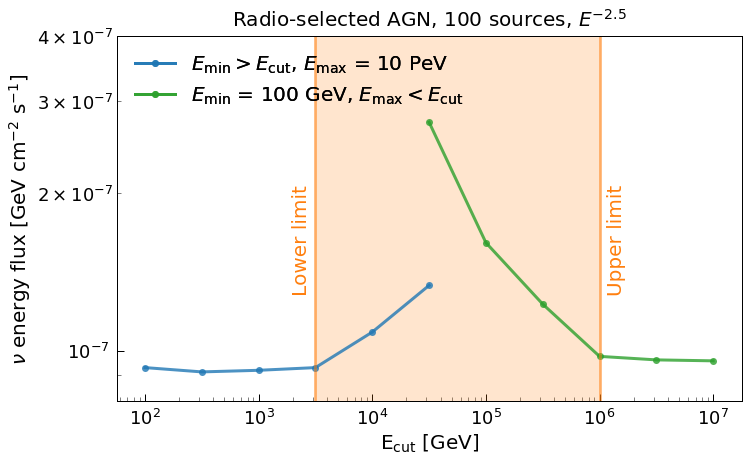

In [12]:
fig1 = plt.figure(1,figsize=(10*1.05, 10*1.05/1.61))
ax1 = plt.subplot(1,1,1)
ax1.plot(df_rsrlagn_gamma25["e_min_gev"][:], df_rsrlagn_gamma25['int_sensitivity_100GeV10PeV'], 
         ls='-', lw=3,
         color='C0', alpha=0.8,
         marker = 'o',
         label = r'$E_{\mathrm{min}}>E_{\mathrm{cut}}$, $E_{\mathrm{max}}$ = 10 PeV')


ax1.plot(df_rsrlagn_gamma25upp["e_max_gev"][:], df_rsrlagn_gamma25upp['int_sensitivity_100GeV10PeV'], 
         ls='-', lw=3,
         color='C2', alpha=0.8,
         marker = 'o',
         label = r'$E_{\mathrm{min}}$ = 100 GeV, $E_{\mathrm{max}}<E_{\mathrm{cut}}$')




ax1.set_ylabel(r'$\nu$ energy flux [GeV cm$^{-2}$ s$^{-1}$]') #,color='C0')
# ax1.tick_params('y', colors='C0')

# ax1.set_xlabel(r"Integrated X-Ray flux of all stacked sources [erg cm$^{-2}$ s$^{-1}$]")
# ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.grid(False) # which='both')
ax1.set_yscale("log")
# # ax1.set_ylim(1e-12, 2e-8)
# minorLocator = AutoMinorLocator()
# ax.grid(axis='y', which='both')

# ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax1.set_xscale("log")
ax1.set_xlabel(r'E$_{\mathrm{cut}}$ [GeV]')
# ax1.set_xticks([1, 10, 100, 1000, 10000])
# ax1.get_xaxis().set_major_formatter(ScalarFormatter())


# ax1.legend(prop={'size':20}, loc='upper left', framealpha=1, frameon=0)

handles, labels = ax1.get_legend_handles_labels()
display = (0,1)
simArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='-',lw=3)
anyArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='--',lw=3)
legend1 = ax1.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc= 'upper left' , 
                     frameon=0,
                    framealpha =1, ncol=1, prop={'size':20})
plt.gca().add_artist(legend1)

# leg = ax1.legend([simArtist, anyArtist], [r'Discovery Potential ($5\sigma$)', r'Sensitivity (90%)'],
#                 loc = 'upper left', framealpha = 1, prop={'size':20}, 
#              frameon=0, ncol=1, numpoints=2)



plt.title(r'Radio-selected AGN, 100 sources, $E^{-2.5}$', y=1.01, fontsize=20)
plt.axvline(x=3162.28, ls='-', lw=3, color='C1', alpha=0.5)
plt.axvline(x=1e6, ls='-', lw=3, color='C1', alpha=0.5)


y = np.linspace(8e-8,4e-7)
plt.fill_betweenx(y, x1=3162.28, x2=1e6, color='C1', alpha=0.2)
# plt.annotate("IceCube\nPreliminary ", (0.65, 0.1), alpha=0.7, fontsize=30, xycoords="axes fraction",
#              multialignment="center", rotation=0)

plt.annotate("Lower limit", (0.28,0.3), alpha=1, fontsize=20, xycoords="axes fraction",color='C1',
             multialignment="center", rotation=90)

plt.annotate("Upper limit", (0.785,0.3), alpha=1, fontsize=20, xycoords="axes fraction",color='C1',
             multialignment="center", rotation=90)



# plt.xlim(80, 4e4)
plt.ylim(8e-8, 4e-7)
plt.tight_layout()
# fig1.savefig(plots_path + "nt8yr_gamma25_rlagn_radio_sens_encut_bothlimits.png", format='png')











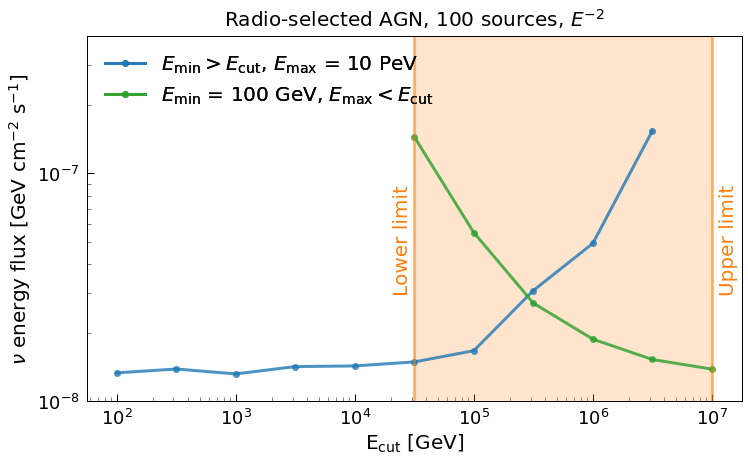

In [13]:
fig1 = plt.figure(1,figsize=(10*1.05, 10*1.05/1.61))
ax1 = plt.subplot(1,1,1)
ax1.plot(df_rsrlagn_gamma2["e_min_gev"][:], df_rsrlagn_gamma2['int_sensitivity_100GeV10PeV'], 
         ls='-', lw=3,
         color='C0', alpha=0.8,
         marker = 'o',
#          label = r'[$E_{\mathrm{min}}$, 10 PeV]')
         label = r'$E_{\mathrm{min}}>E_{\mathrm{cut}}$, $E_{\mathrm{max}}$ = 10 PeV')



ax1.plot(df_rsrlagn_gamma2upp["e_max_gev"][:], df_rsrlagn_gamma2upp['int_sensitivity_100GeV10PeV'], 
         ls='-', lw=3,
         color='C2', alpha=0.8,
         marker = 'o',
#          label = r'[100 GeV, $E_{\mathrm{max}}$]')
         label = r'$E_{\mathrm{min}}$ = 100 GeV, $E_{\mathrm{max}}<E_{\mathrm{cut}}$')





ax1.set_ylabel(r'$\nu$ energy flux [GeV cm$^{-2}$ s$^{-1}$]') #,color='C0')
# ax1.tick_params('y', colors='C0')

# ax1.set_xlabel(r"Integrated X-Ray flux of all stacked sources [erg cm$^{-2}$ s$^{-1}$]")
# ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.grid(False) # which='both')
ax1.set_yscale("log")
# # ax1.set_ylim(1e-12, 2e-8)
# minorLocator = AutoMinorLocator()
# ax.grid(axis='y', which='both')

# ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax1.set_xscale("log")
ax1.set_xlabel(r'E$_{\mathrm{cut}}$ [GeV]')
# ax1.set_xticks([1, 10, 100, 1000, 10000])
# ax1.get_xaxis().set_major_formatter(ScalarFormatter())


# ax1.legend(prop={'size':20}, loc='upper left', framealpha=1, frameon=0)

handles, labels = ax1.get_legend_handles_labels()
display = (0,1)
simArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='-',lw=3)
anyArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='--',lw=3)
legend1 = ax1.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc= 'upper left' , 
                     frameon=0,
                    framealpha =1, ncol=1, prop={'size':20})
plt.gca().add_artist(legend1)

# leg = ax1.legend([simArtist, anyArtist], [r'Discovery Potential ($5\sigma$)', r'Sensitivity (90%)'],
#                 loc = 'upper left', framealpha = 1, prop={'size':20}, 
#              frameon=0, ncol=1, numpoints=2)



plt.title(r'Radio-selected AGN, 100 sources, $E^{-2}$', y=1.01, fontsize=20)
plt.axvline(x=31622.8, ls='-', lw=3, color='C1', alpha=0.5)
plt.axvline(x=1e7, ls='-', lw=3, color='C1', alpha=0.5)


y = np.linspace(1e-8, 4e-7)
plt.fill_betweenx(y, x1=31622.8, x2=1e7, color='C1', alpha=0.2)
# plt.annotate("IceCube\nPreliminary ", (0.65, 0.1), alpha=0.7, fontsize=30, xycoords="axes fraction",
#              multialignment="center", rotation=0)

plt.annotate("Lower limit", (0.468,0.3), alpha=1, fontsize=20, xycoords="axes fraction",color='C1',
             multialignment="center", rotation=90)

plt.annotate("Upper limit", (0.965,0.3), alpha=1, fontsize=20, xycoords="axes fraction",color='C1',
             multialignment="center", rotation=90)



# plt.xlim(80, 4e4)
plt.ylim(1e-8, 4e-7)
plt.tight_layout()
# fig1.savefig(plots_path + "nt8yr_gamma2_rlagn_radio_sens_encut_bothlimits.png", format='png')










